In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore')      # Ignore warnings

print('Setup Completed')

Setup Completed


In [3]:
df = pd.read_csv('PJME_hourly.csv', parse_dates=True, index_col='Datetime')
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [4]:
df.head(5)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [5]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [6]:
df.isnull().sum()

PJME_MW    0
dtype: int64

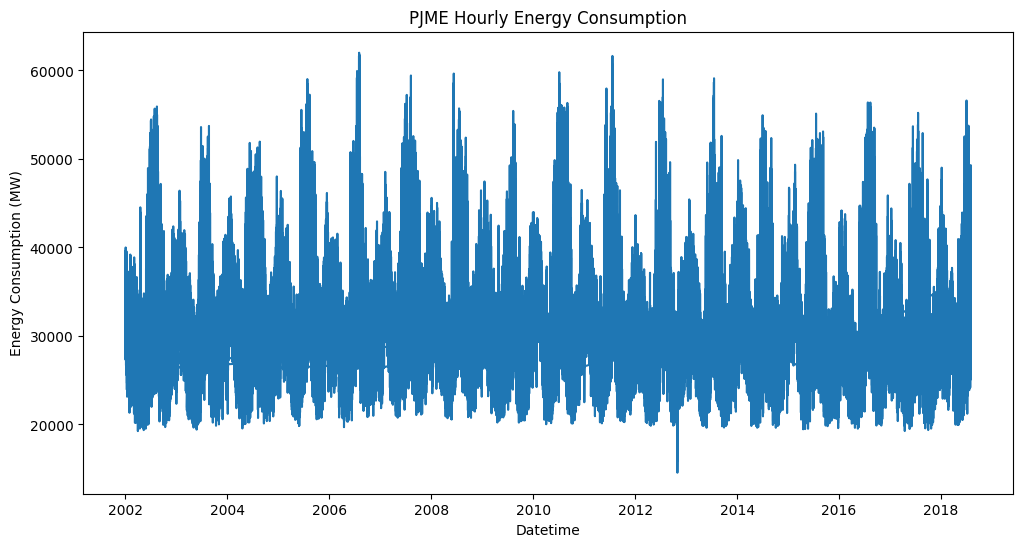

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['PJME_MW'])
plt.title('PJME Hourly Energy Consumption')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.show()

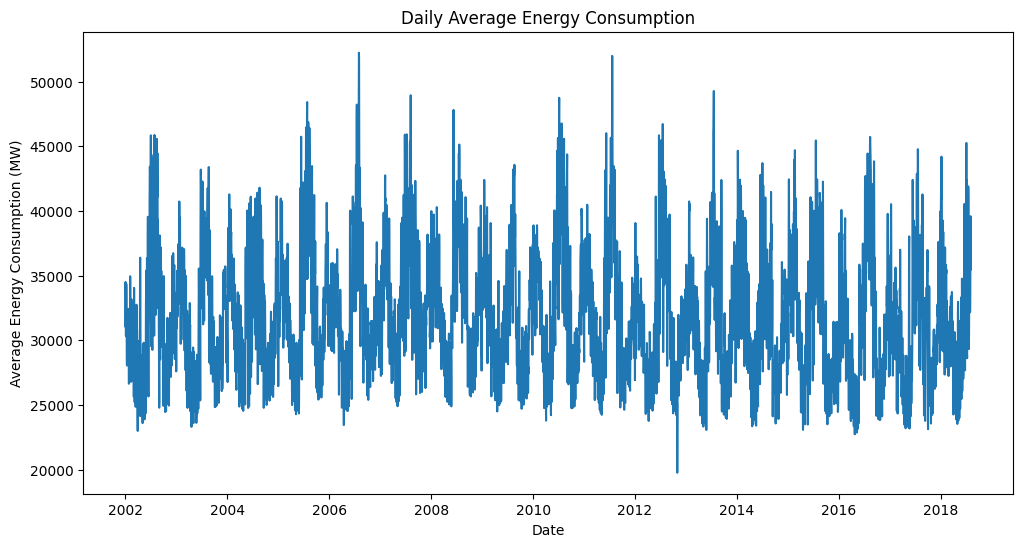

In [8]:
daily_data = df['PJME_MW'].resample('D').mean()
plt.figure(figsize=(12,6))
plt.plot(daily_data)
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (MW)')
plt.show()

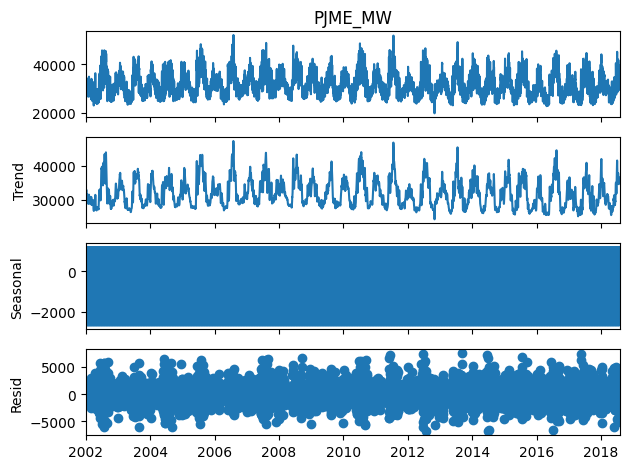

In [9]:
# Decompose the daily time series
decomposition = seasonal_decompose(daily_data, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

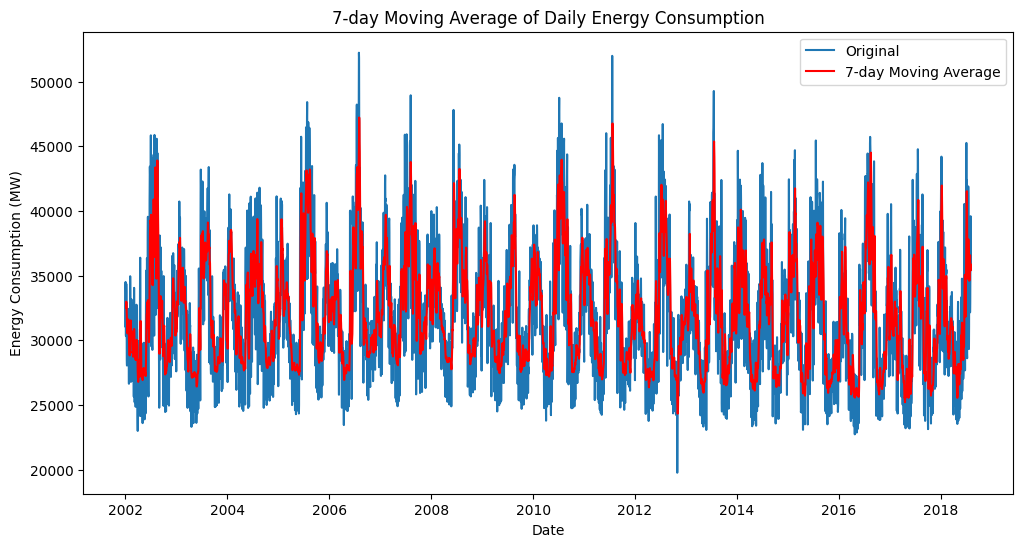

In [10]:
moving_avg = daily_data.rolling(window=7).mean()
plt.figure(figsize=(12,6))
plt.plot(daily_data, label='Original')
plt.plot(moving_avg, color='red', label='7-day Moving Average')
plt.title('7-day Moving Average of Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

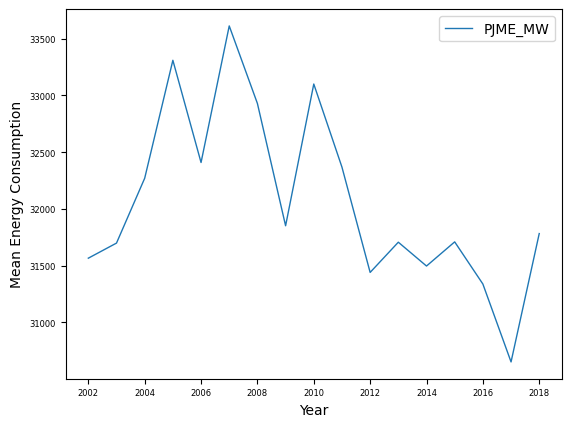

<Figure size 1500x800 with 0 Axes>

In [11]:
consumpation_by_year = df.groupby(df.index.year).mean()

# Plot the mean for each year
ax = consumpation_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Energy Consumption')
ax.legend(fontsize=10)
plt.figure(figsize=(15, 8))
plt.show()

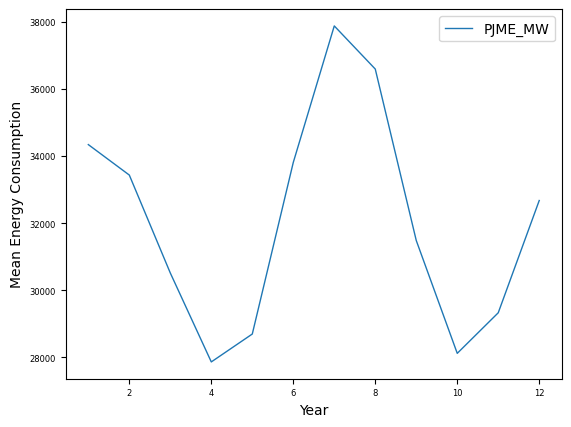

<Figure size 1500x800 with 0 Axes>

In [12]:
# Compute the mean for each year
consumpation_by_month = df.groupby(df.index.month).mean()

# Plot the mean for each year
ax = consumpation_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Energy Consumption')
ax.legend(fontsize=10)
plt.figure(figsize=(15, 8))
plt.show()

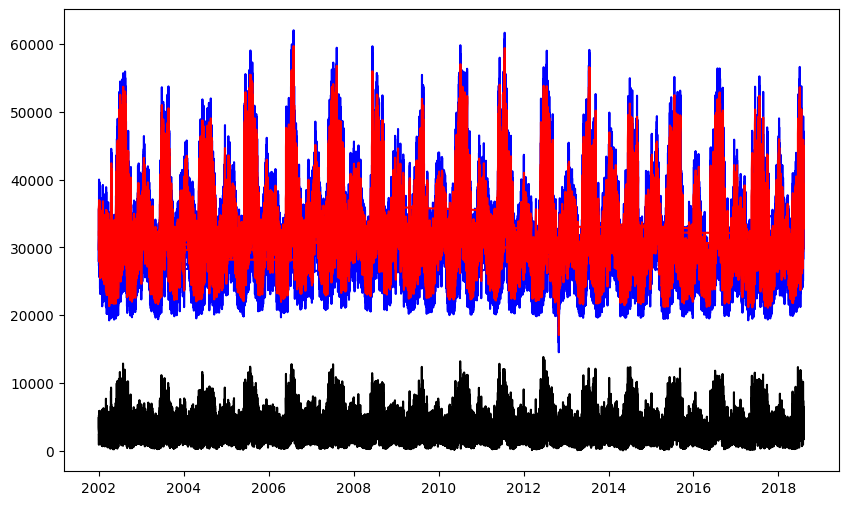

In [13]:
rolling_mean = df['PJME_MW'].rolling(window=12).mean()
rolling_std = df['PJME_MW'].rolling(window=12).std()

# plotting the original data along Rolling
plt.figure(figsize=(10, 6))
plt.plot(df['PJME_MW'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')

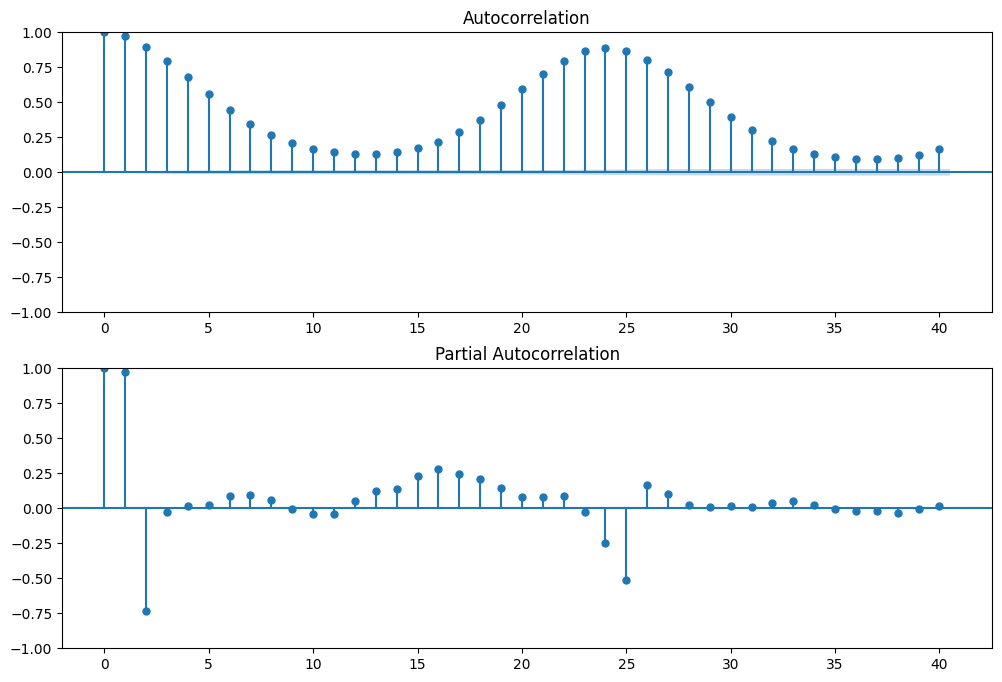

In [14]:
# Check stationarity and determine d
result = adfuller(df['PJME_MW'])
d = 0
if result[1] > 0.05:
    d = 1

# Differencing if needed
if d > 0:
    differenced_series = df['PJME_MW'].diff().dropna()
else:
    differenced_series = df['PJME_MW']

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
tsaplots.plot_acf(differenced_series, lags=40, ax=ax1)
tsaplots.plot_pacf(differenced_series, lags=40, ax=ax2)
plt.show()

In [24]:
# from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['PJME_MW'],order=(2,1,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                PJME_MW   No. Observations:               145366
Model:                 ARIMA(2, 1, 4)   Log Likelihood            -1210391.810
Date:                Sat, 25 May 2024   AIC                        2420797.620
Time:                        21:04:59   BIC                        2420866.829
Sample:                             0   HQIC                       2420818.276
                             - 145366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8951      0.001   2093.626      0.000       1.893       1.897
ar.L2         -0.9594      0.001  -1243.499      0.000      -0.961      -0.958
ma.L1         -1.3646      0.002   -788.360      0.000      -1.368      -1.361
ma.L2          0.1449      0.003     42.699      0.000       0.138       0.152
ma.L3          0.0578      0.006     10.395      0.000       0.047       0.069
ma.L4          0.1972      0.003     62.301      0.000       0.191       0.203
sigma2      9.988e+05   1689.569    591.173      0.000    9.96e+05       1e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.00   Jarque-Bera (JB):            784512.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
 import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df['PJME_MW'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [26]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              PJME_MW   No. Observations:               145366
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood            -1186311.601
Date:                              Sat, 25 May 2024   AIC                        2372629.202
Time:                                      21:05:57   BIC                        2372658.863
Sample:                                           0   HQIC                       2372638.055
                                           - 145366                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9206      0.001  -1381.911      0.000      -0.922      -0.919
ma.S.L12      -0.1279      0.003    -50.846      0.000      -0.133      -0.123
sigma2      7.274e+05    692.656   1050.192      0.000    7.26e+05    7.29e+05
===================================================================================
Ljung-Box (L1) (Q):               12719.60   Jarque-Bera (JB):           8540280.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Datetime'>

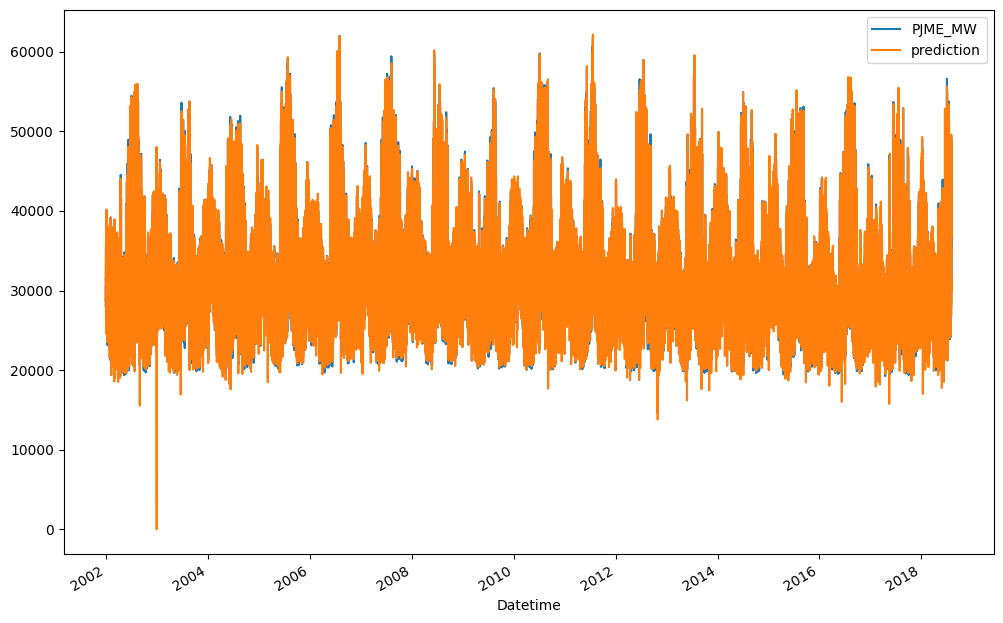

In [27]:
df['prediction'] = results.predict()
df[['PJME_MW','prediction']].plot(figsize=(12,8))

In [28]:
from sklearn.metrics import mean_squared_error


In [29]:
rmse=np.sqrt(mean_squared_error(df['PJME_MW'],df['prediction']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 851.656034353736


In [30]:
score = np.sqrt(mean_squared_error(df['PJME_MW'], df['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 851.66
